In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'STSong'
import warnings
warnings.filterwarnings('ignore')

# 1. 数据读取与预处理

## 1.1 数据预览

读取数据。

In [2]:
df = pd.read_csv('data/rumor_data.csv', index_col=0, parse_dates=['date'])
df.head(3)

,date,source,content,province,user_0,user_1,user_2,user_3,user_4,user_5,...,user_9,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,like
0,2022-02-18,北京日报客户端,有人从香港游泳偷渡到深圳湾被捕？假的！系轻生被救！,广东,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-02-18,大河报、羊城晚报,近日，社交媒体上一则题为“河南一位老爷爷考上清华大学被顶替”的消息引发网友关注和转发。消息...,河南,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,41
2,2022-02-17,南方都市报、大众网,近日，网传湖南衡阳“南岳衡山寺庙”高薪招聘住持，月薪高达5万元，弹性工作制，下班后原则上不...,湖南,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,26


数据形状。

In [3]:
df.shape

(366, 23)

数据信息与格式。

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      366 non-null    datetime64[ns]
 1   source    360 non-null    object        
 2   content   366 non-null    object        
 3   province  277 non-null    object        
 4   user_0    366 non-null    int64         
 5   user_1    366 non-null    int64         
 6   user_2    366 non-null    int64         
 7   user_3    366 non-null    int64         
 8   user_4    366 non-null    int64         
 9   user_5    366 non-null    int64         
 10  user_6    366 non-null    int64         
 11  user_7    366 non-null    int64         
 12  user_8    366 non-null    int64         
 13  user_9    366 non-null    int64         
 14  user_10   366 non-null    int64         
 15  user_11   366 non-null    int64         
 16  user_12   366 non-null    int64         
 17  user_13   366 no

查看缺失值。

In [5]:
df.isna().sum(0)

date         0
source       6
content      0
province    89
user_0       0
user_1       0
user_2       0
user_3       0
user_4       0
user_5       0
user_6       0
user_7       0
user_8       0
user_9       0
user_10      0
user_11      0
user_12      0
user_13      0
user_14      0
user_15      0
user_16      0
user_17      0
like         0
dtype: int64

## 1.2 source列清洗

首先查看source列的数据，发现：
- 一条谣言有多个source，通常以'、'和'@'作为分隔符
- 含有'丨'符号的表示谣言散播者为个人，而非平台或组织
- 有些含有'#'字符，可能影响到字符串匹配
- 有一条如'capd.gov.cn进行举报。 辟谣君提醒，网络非法外之地！希望广大网民不造谣、不信谣、不传谣。对于编造、传播网络不实信息，严重扰乱社会秩序的违法犯罪行为，公安机关将坚决依法予以打击。 消息来源：国家乡村振兴局'，消息来源应该为国家乡村振兴局
- 有些source中不仅仅包含散播谣言单位，还包含了小广告，应该删除
- 有6条缺失值

In [6]:
df['source'].unique()

array(['北京日报客户端', '大河报、羊城晚报', '南方都市报、大众网', '江苏省互联网举报中心', '中国新闻网',
       '深圳新闻网、深圳教育', '徐汇交警、人民网', '南宁举报辟谣', '灵山警方、八桂警事', '央视网、广西日报',
       '杭州发布、浙江日报', '人民日报、环球网', '南国早报', '汉中市教育局',
       '昌黎县委网信办、秦皇岛网络辟谣、河北省秦皇岛市北戴河新区新闻中心', '广西政法、南国早报、中国互联网联合辟谣平台',
       '平南县第二人民医院、广西互联网举报中心', '天津辟谣、津云、环球网', '广西互联网辟谣平台', '平安长垣',
       '网信故城、河北日报', '麻城市公安局', '央视网、光明网、焦作日报', '中国互联网联合辟谣平台',
       '头条辟谣联合@川观新闻，发布2022年1月十大社会热点谣言榜；联合@健康中国，发布1月健康谣言榜和食品安全谣言榜。帮你扫除谣言，还原事实！',
       '北京日报、新京报', '河北日报', '人民网、南方日报', '钱江晚报', '浙江日报', '上海网络辟谣、上观新闻',
       '大连市应急管理局', '福建辟谣', '八桂警方在线', '解放日报、澎湃新闻', '中国互联网联合辟谣平台、共青团中央',
       '北京2022年冬奥会和冬残奥会组织委员会', '雁塔宣传（中共西安市雁塔区委外宣办官方账号）',
       '魅力碑林（西安市碑林区官方账号）', '台州网警巡查执法', '光明日报', '湖南省教育厅', '北京西城、丰汇物业',
       '咸阳市网络举报中心、中国妇女报、法治日报', '广西壮族自治区公安厅政治部宣传处', '德清发布、湖州市人民政府',
       '榆林网警巡查执法', '杭州日报、钱江晚报', '泉州网警巡查执法、泉州市卫生健康委员会', '奥克兰战争纪念博物馆',
       '新绛公安', '滦州网信、滦州刑侦', '法新社、新华社、澎湃新闻', '红星新闻',
       '曲阜市委统筹疫情防控和经济运行工作领导小组（指挥部）办公室、每日经济新闻',
       '广州市天河区新冠肺炎疫情防控指挥部办公室、横琴长隆国际海洋度

对含有字符'@'的source做修改。

In [7]:
df['source'][['@' in str(s) for s in df['source']]]

24     头条辟谣联合@川观新闻，发布2022年1月十大社会热点谣言榜；联合@健康中国，发布1月健康谣...
131    头条辟谣 联合@川观新闻，发布12月十大社会热点谣言榜；联合@健康中国，发布12月健康谣言榜...
276    头条辟谣 联合 @皮皮川SCOL，发布11月十大社会热点谣言榜；联合@健康中国，发布11月健...
Name: source, dtype: object

In [8]:
df['source'][24] = '头条辟谣、川观新闻、健康中国'
df['source'][131] = '头条辟谣、川观新闻、健康中国'
df['source'][276] = '头条辟谣、皮皮川SCOL、健康中国'

对含有'#'的source做修改。

In [9]:
df['source'][['#' in str(s) for s in df['source']]]

162    成都市人力资源和社会保障局、光明网 #过年# #年假##年假休完了吗#
326                            三联生活周刊 #护肤#
Name: source, dtype: object

In [10]:
df['source'][162] = '成都市人力资源和社会保障局、光明网'
df['source'][326] = '三联生活周刊'

对混乱字符串做修改。

In [11]:
df['source'][['丨' in str(s) for s in df['source']]]

109                            RD注册营养师薛庆鑫丨中国营养学会会员 注册营养师
171                            RD注册营养师薛庆鑫丨中国营养学会会员 注册营养师
322    消化科李主任丨首都医科大学北京佑安医院消化内科主任医师 更多胃癌辟谣，点击下方链接查看： h...
328                            RD注册营养师薛庆鑫丨中国营养学会会员 注册营养师
Name: source, dtype: object

In [12]:
df['source'][109] = '注册营养师薛庆鑫丨中国营养学会会员'
df['source'][171] = '注册营养师薛庆鑫丨中国营养学会会员'
df['source'][322] = '消化科李主任丨首都医科大学北京佑安医院消化内科主任医师'
df['source'][328] = '注册营养师薛庆鑫丨中国营养学会会员'

In [13]:
df['source'][['国家医保局）' in str(s) for s in df['source']]]

251    人民日报、科技日报、国家医保局）
Name: source, dtype: object

In [14]:
df['source'][251] = '人民日报、科技日报、国家医保局'

In [15]:
df['source'][['capd.gov.cn' in str(s) for s in df['source']]]

305    capd.gov.cn进行举报。 辟谣君提醒，网络非法外之地！希望广大网民不造谣、不信谣、不...
Name: source, dtype: object

In [16]:
df['source'][305] = '国家乡村振兴局'

查看source有缺失的新闻，试图寻找到其真实的source，发现即使涉及到地点，地点这一列仍然为缺失值，因此同时修改对应地点的数据。
- 201：[福建辟谣、澎湃新闻](https://m.thepaper.cn/baijiahao_15939258)，不涉及地理信息
- 256：[头条辟谣](https://m.toutiao.com/is/yeXte5q/)，涉及地点为沈阳
- 280：[腾讯新闻](https://view.inews.qq.com/k/20211126A08M5600?no-redirect=1&web_channel=wap&openApp=false&share_token=4E7E2843-F939-4840-BCA7-87ADC8E637AE&tt_from=copy_link&utm_source=copy_link&utm_medium=toutiao_ios&utm_campaign=client_share)，不涉及具体到省的地理信息
- 311：[大庆广播电视台](https://m.toutiao.com/is/yeXoRnU/)，涉及地点为河南
- 327：[广西互联网辟谣平台](https://m.toutiao.com/is/ye4peqe/)，涉及地点为广西
- 331：北京市市场监督管理局（辟谣单位包含在谣言内容中），涉及地点为北京

In [17]:
df['content'][df['source'].isna()]

201     近日，网传一段“失明男舞者动情演绎探戈”的视频，视频配文称“因为热爱！心里有光！致敬舞者！...
256     近日，有人在社交平台发布视频称“11月16日，沈阳北站南广场发生爆炸”“第七大队出警99人...
280     近日，网传视频称““在亚欧大陆上有一个特别大的人造转盘，能提升地基高差异，中欧班列正日夜奔...
311     近日，网传视频称“河南汝州一个小区，凌晨3:10，小轿车疯狂鸣笛，楼上居民扔酒瓶还击，小轿...
327     11月15日，部分兴安县网民在社交平台传播视频称“兴安县发生交通事故”“一男子在兴安西环路...
331     近日，北京部分市场主体收到短信称“商户营业执照状态显示异常，法人信息过期”“北京市市场监督...
Name: content, dtype: object

In [18]:
# 201
df['source'][201] = '福建辟谣、澎湃新闻'
# 256
df['source'][256] = '头条辟谣'
df['province'][256] = '沈阳'
# 280
df['source'][280] = '腾讯新闻'
# 311
df['source'][311] = '大庆广播电视台'
df['province'][311] = '河南'
# 327
df['source'][327] = '广西互联网辟谣平台'
df['province'][327] = '广西'
# 331
df['source'][331] = '北京市市场监督管理局'
df['province'][331] = '北京'

再次查看缺失值，发现都已经填补完成。

In [19]:
df['source'].isna().sum(0)

0

处理好source数据后，生成每条谣言来源的哑变量数据。

In [20]:
df_source_dum = df['source'].str.get_dummies('、')
df_source_dum

,1018陕广新闻,万山公安,三亚日报,三联生活周刊,上林县公安局,上海发布,上海市卫健委,上海网络辟谣,上海网络辟谣,上观新闻,...,陕西渭南临渭公安,雁塔宣传（中共西安市雁塔区委外宣办官方账号）,青岛市卫生健康委员会,靖边县公安局,魅力碑林（西安市碑林区官方账号）,鹰潭网警巡查执法,麻城市公安局,黄冈网警巡查执法,黑龙江交通广播,黑龙江网络广播电视台都市频道
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


倒序排列，查看辟谣数最多的前10家平台。

In [21]:
df_source_dum.sum(0).sort_values(ascending=False).head(10)

中国互联网联合辟谣平台    15
光明网            13
中国新闻网          11
福建辟谣           10
澎湃新闻            9
浙江辟谣平台          8
人民网             7
上观新闻            7
浙江日报            7
环球网             7
dtype: int64

增加source_num列，含义为对某一条谣言进行辟谣的媒体数量。

In [22]:
df['source_num'] = df_source_dum.sum(1)
df.head(3)

,date,source,content,province,user_0,user_1,user_2,user_3,user_4,user_5,...,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17,like,source_num
0,2022-02-18,北京日报客户端,有人从香港游泳偷渡到深圳湾被捕？假的！系轻生被救！,广东,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2022-02-18,大河报、羊城晚报,近日，社交媒体上一则题为“河南一位老爷爷考上清华大学被顶替”的消息引发网友关注和转发。消息...,河南,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,41,2
2,2022-02-17,南方都市报、大众网,近日，网传湖南衡阳“南岳衡山寺庙”高薪招聘住持，月薪高达5万元，弹性工作制，下班后原则上不...,湖南,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,26,2


## 1.3 province列清洗

province列的缺失值代表不含地理信息，但是对于某些包含地理信息的谣言，province仍然是缺失的。为了让数据的信息更丰富，我根据谣言信息手动为province添加数据。

In [23]:
for i, j in df['content'][df['province'].isna()].items():
    print(i, j, end='\n\n')

4 在塞企业组织包机载客回国？中国驻塞内加尔使馆辟谣！

6  元宵佳节，怎能不来一碗香甜软糯的酒酿汤圆呢？但人们在品尝酒酿汤圆美味的同时，往往忽略了酒酿汤圆含有酒精的事实。近日，有网友发现有商家上线了“食用酒酿汤圆后不要立刻驾车”的温馨提示，该提示上线后引发部分网友讨论：食用酒酿汤圆真的会造成酒驾吗？ 经徐汇交警核查，网传消息属实。食用酒酿汤圆后立即进行酒精检测，体内酒精含量确实会出现异常。 为了验证网传观点，徐汇交警特意录制了相关科普视频。在交警亲身试验过程中，一位交警食用了一碗酒酿汤圆后立即进行酒驾检测，真的出现了酒精超标的结果。不过，10分钟后再次检测，则恢复正常。对此，交警给出的解释，是因为酒酿汤圆中确实含有酒精。 除了酒酿汤圆，在生活中误食这些食物后立即驾车，也可能会“被酒驾”，比如：荔枝、蛋黄派、提拉米苏、腐乳、醉蟹、糟鸡、木瓜水、料酒、酒心糖……大家一定要注意在驾车之前避免食用这些食物。 若不慎误食而被测出“酒驾”，也不要紧张，可以向交警解释，并暂缓几分钟后再进行测试。 辟谣君提醒：酒酿汤圆虽美，但也可能带来“被酒驾” 的小麻烦，大家驾车前还是要注意避免食用哦。此外，元宵佳节，亲朋团聚，难免“久逢知己千杯少”，但也请务必铭记“开车不喝酒，喝酒不开车”。

7 网传横州市马山镇太宁村有一阳性病例接触者？谣言！

8  近日，社交媒体上流传视频称“三隆镇有户人整户感染新冠病毒”。 经灵山警方核查，网传视频为谣言！ 视频真实内容为三隆镇卫生院对居家隔离人员上门进行核酸采样。灵山县公安局三隆派出所民警依法传唤谣言发布者施某龙（男，28岁，灵山县三隆镇三隆村委人）到派出所进一步审查。 谣言发布者施某龙为搏人眼球，在未经核实的情况下，在网络上随意散布疫情不实信息，对社会造成了不良影响，对当事人造成了心理压力和精神伤害，其行为已构成捏造事实诽谤他人。 目前，施某龙已深刻认识到了自己的错误，对其散布不实信息的行为表示十分后悔，并写下保证书保证今后不会再犯类似的错误。根据《中华人民共和国治安管理处罚法》第四十二条第二款之规定，公安机关对施某龙处以治安行政处罚。

10  2月11日晚，网传消息称“江南时代某快餐店食品阳性”。消息发布后，在余杭本地圈群中流传。 经余杭区疫情防控办核实，该消息不实。实则为防疫例行抽样检测，检测结果均为阴性。

23  新春将至，关于冷烟花

In [24]:
df['province'][7] = '广西'
df['province'][8] = '广西'
df['province'][10] = '浙江'
df['province'][36] = '上海'
df['province'][53] = '河北'
df['province'][60] = '湖北'
df['province'][65] = '陕西'
df['province'][73] = '山东'
df['province'][76] = '陕西'
df['province'][90] = '浙江'
df['province'][95] = '陕西'
df['province'][97] = '北京'
df['province'][120] = '陕西'
df['province'][132] = '北京'
df['province'][160] = '陕西'
df['province'][169] = '陕西'
df['province'][191] = '浙江'
df['province'][202] = '浙江'
df['province'][205] = '浙江'
df['province'][206] = '浙江'
df['province'][208] = '福建'
df['province'][218] = '浙江'
df['province'][219] = '浙江'
df['province'][220] = '浙江'
df['province'][227] = '浙江'
df['province'][238] = '浙江'
df['province'][241] = '山东'
df['province'][243] = '广西'
df['province'][253] = '广西'
df['province'][264] = '北京'
df['province'][336] = '江西'
df['province'][337] = '江苏'
df['province'][344] = '福建'
df['province'][357] = '福建'

处理完地理数据后发现缺失值从原来的89条降低至53条，其中很多新标注的地理信息来自于县或镇。无地理信息数据多为健康方面的谣言和国外的谣言，很合理。

In [25]:
df['province'].isna().sum()

53

要在后续可视化任务中使用pyecharts中的Map画出地图，需要在地名上添加“市”或“省”或“自治区”。

In [26]:
def process_province(prov):
    if prov in ['上海', '北京', '重庆', '天津']:
        return prov + '市'
    elif prov == '广西':
        return '广西壮族自治区'
    elif prov == '新疆':
        return '新疆维吾尔自治区'
    elif prov == '宁夏':
        return '宁夏回族自治区'
    elif prov in ['西藏', '内蒙古']:
        return prov + '自治区'
    elif type(prov) == float:
        return prov
    else:
        return prov + '省'

In [27]:
df['province'] = df['province'].apply(process_province)

## 1.4 content列清洗

由于重要信息一般都隐藏在双引号中间，因此我首先尝试提取了所有谣言的双引号中的内容，发现有14条谣言未能提取出核心信息。

In [28]:
no_match = [idx for idx, content in df['content'].str.findall(r'“([^”]*)”').items() if len(content) == 0]
no_match, len(no_match)

([0, 4, 7, 22, 38, 92, 131, 146, 149, 237, 276, 287, 338, 342], 14)

尝试手动提取，发现提取不出的原因多为：
- 谣言为问句，不在双引号内，后跟问号
- 双引号反了

In [29]:
for i, j in df['content'][no_match].items():
    print(i, j, end='\n\n')

0 有人从香港游泳偷渡到深圳湾被捕？假的！系轻生被救！

4 在塞企业组织包机载客回国？中国驻塞内加尔使馆辟谣！

7 网传横州市马山镇太宁村有一阳性病例接触者？谣言！

22  近日，网传河南沁阳市一男子在社交软件上售卖虎皮、虎肉，宣称每斤1000元。 经沁阳公安机关核查，网传消息不实。 2月2日，沁阳警方发布通报称，段某（男，汉族，现年43岁）以网购的鹿肉冒充虎肉，用修图后的狗皮图片冒充虎皮，并捏造聊天记录发布虚假信息，欲从中牟利。 截至案发，尚无人受骗上当。目前，警方以涉嫌非法利用信息网络罪对段某立案调查，案件正在进一步办理中。根据相关法律，老虎是国家一级保护动物，非法收购、运输、出售等行为最高可处10年以上有期徒刑。 

38  近日，2022年北京冬奥会和冬残奥会开幕在即，网上出现不少关于北京冬奥会赛会志愿者或城市志愿者的招募活动信息。 经北京奥组委核查，这些招募信息均为虚假信息。 1月24日，北京冬奥会官方账号针对近期发现的志愿者招募相关不实信息，发布官方通告： 一、北京冬奥会赛会志愿者招募工作由北京冬奥组委负责，已于2021年10月完成。北京冬奥会城市志愿者由共青团北京市委员会和共青团河北省委员会统筹招募。 二、其它任何企业、组织或个人以招募北京冬奥会赛会志愿者或城市志愿者的名义发布的招募活动信息均为虚假信息。请各界人士避免上当受骗，如因此受到损失和不法侵害，请立即报警，通过法律途径解决。 三、北京冬奥会赛会志愿者和城市志愿者招募过程中不会向志愿者收取报名费、培训费、交通费等任何费用，服务期间不发放工资。 四、北京冬奥组委保留对涉嫌违法违规的企业、组织或个人进一步追究法律责任的权利。

92 网传西安一小区有男子将妻儿从15楼扔下？辟谣！坠楼事件并非发生在西安！警方：妻儿坠楼和男子无关 

131 沈阳发生爆炸，99名出警英雄全部不幸牺牲？ 打鼾就是睡得香？ 吃草莓会感染出血热？近期，围绕着社会、健康和食品的谣言频发，给大众的正常生活造成了困扰。 在2021年的最后一天，

146 福建省多所高校放假时间确定，寒假提前放？部分高校回应：不准确！ 

149 西安咸阳机场的空调造成病毒传播？辟谣！ 

237  12月8日，网传”江苏昆山张浦镇一小区发生杀人分尸案件“。 经核查，上述消息为谣言。 昆山市公安局接到报警后立即前往案发地展开调查。经现场勘查取

在这些条目的重要内容上添加双引号便于提取。

In [30]:
df['content'][0] = '“有人从香港游泳偷渡到深圳湾被捕？”假的！系轻生被救！'
df['content'][4] = '“在塞企业组织包机载客回国？”中国驻塞内加尔使馆辟谣！'
df['content'][7] = '网传“横州市马山镇太宁村有一阳性病例接触者？”谣言！'
df['content'][22] = '近日，网传“河南沁阳市一男子在社交软件上售卖虎皮、虎肉，宣称每斤1000元”。 经沁阳公安机关核查，网传消息不实。 2月2日，沁阳警方发布通报称，段某（男，汉族，现年43岁）以网购的鹿肉冒充虎肉，用修图后的狗皮图片冒充虎皮，并捏造聊天记录发布虚假信息，欲从中牟利。 截至案发，尚无人受骗上当。目前，警方以涉嫌非法利用信息网络罪对段某立案调查，案件正在进一步办理中。根据相关法律，老虎是国家一级保护动物，非法收购、运输、出售等行为最高可处10年以上有期徒刑。'
df['content'][38] = '近日，2022年北京冬奥会和冬残奥会开幕在即，网上出现不少关于“北京冬奥会赛会志愿者或城市志愿者的招募活动信息”。 经北京奥组委核查，这些招募信息均为虚假信息。 1月24日，北京冬奥会官方账号针对近期发现的志愿者招募相关不实信息，发布官方通告： 一、北京冬奥会赛会志愿者招募工作由北京冬奥组委负责，已于2021年10月完成。北京冬奥会城市志愿者由共青团北京市委员会和共青团河北省委员会统筹招募。 二、其它任何企业、组织或个人以招募北京冬奥会赛会志愿者或城市志愿者的名义发布的招募活动信息均为虚假信息。请各界人士避免上当受骗，如因此受到损失和不法侵害，请立即报警，通过法律途径解决。 三、北京冬奥会赛会志愿者和城市志愿者“招募过程中不会向志愿者收取报名费、培训费、交通费等任何费用，服务期间不发放工资”。 四、北京冬奥组委保留对涉嫌违法违规的企业、组织或个人进一步追究法律责任的权利。'
df['content'][92] = '网传“西安一小区有男子将妻儿从15楼扔下？”辟谣！坠楼事件并非发生在西安！警方：妻儿坠楼和男子无关 '
df['content'][131] = '“沈阳发生爆炸，99名出警英雄全部不幸牺牲？”“打鼾就是睡得香？”“吃草莓会感染出血热？”近期，围绕着社会、健康和食品的谣言频发，给大众的正常生活造成了困扰。'
df['content'][146] = '“福建省多所高校放假时间确定，寒假提前放？”部分高校回应：不准确！ '
df['content'][149] = '“西安咸阳机场的空调造成病毒传播？”辟谣！'
df['content'][237] = '12月8日，网传“江苏昆山张浦镇一小区发生杀人分尸案件”。 经核查，上述消息为谣言。 昆山市公安局接到报警后立即前往案发地展开调查。经现场勘查取证，认定死者系跳楼自杀，在高坠过程中发生碰撞并造成身体局部离断。并非网传被杀害后分尸。'
df['content'][276] = '“教育部将调整小学入学年龄？”“肠清茶可以治疗便秘？”“多吃黑芝麻能让头发变黑？”近期，围绕着社会、健康和食品的谣言频发，给大众的正常生活造成了困扰。'
df['content'][287] = '“上海医疗机构接受医药代表请客？”上海卫健委主任辟谣！ '
df['content'][338] = '“沈阳取消楼市限购？”沈阳房产局回应：谣言！ '
df['content'][342] = '“今冬能源供应不足？”不必过度担心！'

提取正确的文本中间应该是不会出现'“'和'”'符号的，看看文本是否都提取正确。

In [31]:
no_match = [idx for idx, content in df['content'].str.findall(r'“([^”]*)”').items() if '“' in '，'.join(content)]
no_match, len(no_match)

([269, 280, 351], 3)

果然有匹配不正确的地方，原来是因为：
- 文字漏了一个'”'。
- 文字多了一个'“'。
- 单双引号使用不规范，双引号内再用引号应该使用单引号。

In [32]:
for i, j in df['content'][no_match].items():
    print(i, j, end='\n\n')

269  近日，网传消息称“世卫组织总干事谭德赛在11月29日于日内瓦发表讲话称：没有一个国家可以通过接种疫苗来摆脱新冠疫情。消息发布后引发部分网友恐慌。 经核查，网传消息不实，系翻译错误。 在翻看了世卫组织原文后，辟谣君发现：世卫组织总干事谭德塞真正想表达的意思是：呼吁各国共享疫苗，促进疫苗平等，共同战胜疫情。 而造成此次误会的原因，为翻译错误。 世卫组织原文为：“No country can vaccinate its way out of the pandemic alone. The longer vaccine inequity persists， the more opportunity this virus has to spread and evolve in ways we cannot predict nor prevent. We are all in this together”. 正确的翻译应为：“没有一个国家可以依靠独自接种疫苗来摆脱疫情。疫苗不平等持续的时间越长，病毒就越有机会以我们无法预测或预防的方式传播和进化。我们荣辱与共”。

280  近日，网传视频称““在亚欧大陆上有一个特别大的人造转盘，能提升地基高差异，中欧班列正日夜奔驰在这条路上” “中欧班列上百节车厢在转盘上运转，把不可能变成可能.....” 然而， 经核实网传视频内容严重失实。 据查证，网传视频内容实为电子游戏内容。视频原作者名为：Daffa Railfans ID，是一名铁路游戏爱好者。自今年9月起，他一直在海外社交媒体更新某款铁路火车模拟器游戏。 上述谣言所引用的视频，就是Daffa Railfans ID在9月21日发布的。谣言制造者在对相关视频进行节选后，配上了编造的文字。

351  11月9日，社交平台上有消息称“在娇（实为“交”）子公园建方舱医院”“一晚建好，明天隔离黄码人群”。 经核查，上述消息为谣言。 成都高新技术产业开发区发布官方声明称，为提高高新区大规模核酸检测能力，高投集团按照疫情防控指挥部要求在交子公园附近增设核酸检测点。并非网传修建方舱医院。 “方舱医院”属于解放军野战机动医疗系统，是一种方便搭建的移动医院。由于机动性好、环境适应性强等特点，方舱医院通常用于紧急医疗救援任务中。在2008年汶川地震，2020年初新冠疫情期间，方舱医院都发挥了

将这些文本修改规范。

In [33]:
df['content'][269] = '近日，网传消息称世卫组织总干事谭德赛在11月29日于日内瓦发表讲话称：“没有一个国家可以通过接种疫苗来摆脱新冠疫情”。消息发布后引发部分网友恐慌。 经核查，网传消息不实，系翻译错误。 在翻看了世卫组织原文后，辟谣君发现：世卫组织总干事谭德塞真正想表达的意思是：呼吁各国共享疫苗，促进疫苗平等，共同战胜疫情。 而造成此次误会的原因，为翻译错误。 正确的翻译应为：“没有一个国家可以依靠独自接种疫苗来摆脱疫情。疫苗不平等持续的时间越长，病毒就越有机会以我们无法预测或预防的方式传播和进化。我们荣辱与共”。 '
df['content'][280] = '近日，网传视频称“在亚欧大陆上有一个特别大的人造转盘，能提升地基高差异，中欧班列正日夜奔驰在这条路上” “中欧班列上百节车厢在转盘上运转，把不可能变成可能.....” 然而， 经核实网传视频内容严重失实。 据查证，网传视频内容实为电子游戏内容。视频原作者名为：Daffa Railfans ID，是一名铁路游戏爱好者。自今年9月起，他一直在海外社交媒体更新某款铁路火车模拟器游戏。 上述谣言所引用的视频，就是Daffa Railfans ID在9月21日发布的。谣言制造者在对相关视频进行节选后，配上了编造的文字。'
df['content'][351] = '11月9日，社交平台上有消息称“在娇（实为‘交’）子公园建方舱医院”“一晚建好，明天隔离黄码人群”。 经核查，上述消息为谣言。 成都高新技术产业开发区发布官方声明称，为提高高新区大规模核酸检测能力，高投集团按照疫情防控指挥部要求在交子公园附近增设核酸检测点。并非网传修建方舱医院。方舱医院属于解放军野战机动医疗系统，是一种方便搭建的移动医院。由于机动性好、环境适应性强等特点，方舱医院通常用于紧急医疗救援任务中。在2008年汶川地震，2020年初新冠疫情期间，方舱医院都发挥了重要作用。 在新冠疫情期间，方舱医院的“空间大、容量多”从根本上解决了大量轻症患者无院可住的情况。同时，方舱医院可以对患者进行隔离、看护、观察，出现病情恶化可及时转交给正规医院，从而形成一个安全、有序的医疗层级。 近日，随着疫情在全国各地反复出现，网上出现了不少“建方舱医院”的消息，如“山东五莲县建方舱医院”“成都蜀鑫路建方舱医院”“河北辛集市建设方舱医院”等。 经核实，这些消息都是谣言。在疫情中，方舱医院主要是缓解医疗资源紧张的问题，并不是一出现疫情就要建舱。'

当双引号的内容较短时，很可能没有包含有效信息（如地名等），需要对此进行一些处理。当所有双引号中的内容没有一条是在10个字符以上时，提取出对应的索引。

In [34]:
short_match = [idx for idx, content in df['content'].str.findall(r'“([^”]*)”').items() if sum([len(c) > 10 for c in content]) == 0]
short_match, len(short_match)

([2,
  20,
  27,
  51,
  61,
  90,
  120,
  128,
  156,
  160,
  198,
  208,
  223,
  226,
  262,
  264,
  275,
  285,
  315,
  316,
  320,
  321,
  324,
  330,
  333,
  338,
  342,
  356,
  357,
  361],
 30)

查看这些筛选出的谣言文字，发现有些谣言本身就很短，而另一些内容确实存在问题，如：
- 引号内都为地点名称。
- 引号内部为阳性、阴性的核酸检测相关词汇
- 引号内部为当事人的简短话语或配图文案

In [35]:
for i, j in df['content'][short_match].items():
    print(i, j, end='\n\n')

2  近日，网传湖南衡阳“南岳衡山寺庙”高薪招聘住持，月薪高达5万元，弹性工作制，下班后原则上不干预私生活。 经南岳佛教协会核实，该消息为谣言。 2月15日，南岳佛教协会就网传谣言发布辟谣声明称：南岳所辖无名为“南岳衡山寺庙”的宗教场所，也未发布任何招聘住持、首座等公告；网传的招聘信息纯属谣言，恶意引导，性质恶劣，抹黑南岳宗教形象。南岳佛教协会已向公安机关正式报案，将对造谣者依法追究法律责任。

20  2月3日，网传消息称“叶庄全村转移隔离”。 经河北省衡水市故城县网信办核实，网传消息不实。 目前，故城县网信办迅速协调公安机关，对谣言发布者进行批评教育，该用户已认识到自身错误并主动删除了视频。

27  1月28日，一则题为“砂糖橘吃多皮肤会变黄”的消息，冲上了各大热搜榜单。看到这则消息后，部分爱美的朋友因为担心皮肤变黄，不敢吃砂糖橘了！ 经辟谣2022年君查证，短期内摄入大量砂糖橘确实会让皮肤变黄，但一两周后就能白回来。 关于砂糖橘和橘子，辟谣君在过往已经发布多篇科普内容。就在2021年10月，正值橘子上市时，有人将吃橘子引发的皮肤变黄与肝病黄疸相关联，并恶意造谣吃橘子会伤肝。 吃砂糖橘导致皮肤变黄，是因为砂糖橘中富含胡萝卜素。短期内大量摄入胡萝卜素后，人体无法完全分解。这会进一步导致血液中胡萝卜素浓度升高，沉积在皮肤角质层和黏膜部位，出现黄皮肤。在医学上，这叫做“胡萝卜素血症”，与肝脏损伤后引发的黄疸完全是两码事。 事实上，不只是砂糖橘，橘子、胡萝卜、南瓜、木瓜等富含胡萝卜素的食物，大量食用后都会导致“胡萝卜素血症”。但只要停止食用这些富含胡萝卜素的食物后，只要一两周黄皮肤就会慢慢淡去。

51  1月14日-1月15日，南太平洋岛国汤加的洪阿哈阿帕伊岛火山喷发，引发了全球网民的关注。这场地质灾害后，网络上流传着一则题为“汤加火山喷发监控画面”的视频。据该视频素材显示，平静的海面突然被火山爆发打破，大量火山灰和有害气体喷薄而出。 经过溯源查证，网传“汤加火山喷发监控画面”并非实景，更不是本次汤加火山爆发的画面。而是新西兰奥克兰战争纪念博物馆于2019年发布的地质灾害模拟动画。

61  近日，有网民在社交平台发布消息称“红安十五号又要封城”。 经黄冈网警巡查执法和红安网警证实，此为谣言！ 网安大队和红安县公安局杏花派出所经过精准研判，锁定谣言发布者王某厚（男，

对其中有必要进行修改的文本进行处理。

In [36]:
df['content'][2] = '近日，网传“湖南衡阳南岳衡山寺庙高薪招聘住持，月薪高达5万元，弹性工作制，下班后原则上不干预私生活”。 经南岳佛教协会核实，该消息为谣言。 2月15日，南岳佛教协会就网传谣言发布辟谣声明称：南岳所辖无名为南岳衡山寺庙的宗教场所，也未发布任何招聘住持、首座等公告；网传的招聘信息纯属谣言，恶意引导，性质恶劣，抹黑南岳宗教形象。南岳佛教协会已向公安机关正式报案，将对造谣者依法追究法律责任。'
df['content'][90] = '近日，有永康市市民在社交平台“发布核酸检测报告的图片称玩完咯，图片显示：吕某某的核酸检测结果为阳性”。 经核实，以上消息不实！ 经永康市委网信办、永康市公安局迅速开展联合调查，发现该图系伪造。 目前，永康市公安局依法对吕某某处以行政处罚。'
df['content'][156] = '近日，有咸阳乾县的网民在社交平台发布图片称其“核酸检测报告呈阳性”。 经乾县公安局核实，以上信息不实！ 12月25日，乾县公安局发布警情通报：谣言发布者张某某“利用修图工具，将他人的核酸检测报告单改成本人信息，并将检测结果由阴性修改为阳性”，为引起他人注意将伪造报告发布至多个公共平台，部分人员在未经核实的情况下进行转发，造成了不良影响，并引起社会恐慌。 经警方调查，张某某等人对其违法事实供认不讳，因张某某系未成年人，县公安局对其进行批评教育，并责令其监护人严加看管。'
df['content'][160] = '近日，有彬州市民在社交平台发布图片称自己“核酸检测报告呈阳性”。 经彬州市公安局核实，以上消息不实！ 12月23日，彬州市公安局发布通报称：谣言散布者邹某、郭某“用图片编辑软件，将本人核酸检测报告的阴性结果修改为阳性并发至社交平台”。王某、孙某、郑某等人在不明真相、未经核实的情况下将图片转发到多个公众社交平台，造成了不良影响。 王某等人对其违法事实供认不讳，依据《中华人民共和国治安管理处罚法》第二十五条第一项规定，王某等5人涉嫌虚构事实扰乱公共秩序，被彬州市公安局依法处以行政拘留。'
df['content'][198] = '近日，有人在社交平台发布了一张核酸检测报告图片，显示嘉兴市南湖区一居民核酸检测呈阳性。 经嘉兴市公安局南湖区分局大桥派出所核实，图片系恶意伪造！ 造谣者张某某“用图像编辑软件，将他人核酸检测报告中的姓名改为自己的姓名，将检测结果阴性改为阳性”，并发布至社交平台。当前警方正在进一步调查中。 截至目前，嘉兴市南湖区在本轮疫情中没有发现确诊新冠病例和无症状感染者。'
df['content'][226] = '近日，有一位嵊州网民在社交平台上发布图片称再见了兄弟们，图片显示，此人“新冠检测呈阳性”。 经绍兴市公安局证实，以上信息不实，系网民伪造。 经警方调查询问，造谣者何某曾于几天前和同事进行新冠肺炎病毒核酸检测，结果均为阴性。后来何某突发奇想，“将检测结果的图片编辑修改成红色阳性的样式”，并发布了该不实消息。 直到消息发布次日，何某才解释图片实为伪造。 何某的行为违反了《治安管理处罚法》第二十五条规定，构成伪造事实扰乱公共秩序的违法行为，公安机关依法对何某处以行政拘留4日的处罚。'
df['content'][262] = '相信很多朋友都会出现这样的经历：感觉痰卡在喉咙处，咳不出来，干脆咽下去，虽然有点恶心，但嗓子舒服多了。还有些人认为，“咳痰不卫生、不方便，不如咽了之后直接让身体去消化分解”。那么，“痰真的适合被咽下吗？”“咽下后对身体没有影响吗？”今天，辟谣君就来和大家“痰”论真相！首先，辟谣君提倡，当人感觉有痰时，最好的做法是咳出来。痰液作为身体的分泌物，健康状态下，由水、盐分和抗体构成。正常情况下这些分泌物静静地待在呼吸道表面，我们是感受不到的。这些液体能够粘附进入气道内的细菌、病毒、杂质等，当吸附的物质达到一定数量时，人体呼吸道表面的绒毛就会将痰液送到喉咙部位。这时候，我们就能感受到：痰来了。正常情况下，到达喉咙的痰，除了含有水、盐分、蛋白质、吸入的灰尘等，还有进入身体后被免疫系统成功抵抗的细菌等微生物的尸体。如果咽下去，这些东西会随着消化系统的工作，被胃酸分解，通常来说不会对人体造成影响。但为了减少不必要的“杂物”进入体内，将痰咳出来是最好的选择。其次，如果病人患有特殊疾病（如肺结核），感染了较多有害细菌时，这时候咽下去的痰会含有更多的有害物质，消化系统未必能处理干净，可能进一步引发感染，患有肺结核的患者还可能因此患上肠结核。把痰咳出来可以减少健康隐患，但在咳痰时同样应做好防护，防止痰中的细菌在空气中传播。最后，如果咳出的痰出现了以下几种情况，就需要注意了！ 1.白色粘痰。感冒初期的患者、烟民和患有慢性气管炎、支气管炎疾病的中老年会出现这类痰。 2.黄色浓痰。黄色浓痰说明身体内有炎症，患有肺炎、肺脓肿等疾病的患者会咳出黄痰。如果发现身体出现不适，应该及时去医院就诊。 3.黄绿色浓痰。黄绿色的痰液是铜绿假单胞菌感染的特定表现，常见于支气管扩张继发的铜绿假单胞菌感染，一旦发现要及时去医院接受专业诊疗。 4.带血丝痰液。如果不是口腔内有伤口导致痰液带血，则需要考虑肺结核和支气管扩张的可能性，同时，左心衰竭肺水肿患者的痰会出现粉红色泡沫，一旦出现这些情况，也要及时去医院确认病因。'
df['content'][275] = '11月26日，福建省军区警备办公室接群众举报。近日，在泉州石狮市，“有一名男子多次着现役军装出现在采耳店、KTV等休闲场所，并自称某集团军营长，实施不正当交友活动”。 经核实，该男子系假冒军人身份！ 经福建省军区警备纠察队调查，违法人员胡某是一名电工，为满足虚荣心，曾多次购买军服，谎称军人身份活跃于社交平台，穿着现役军装出入娱乐场所，利用社会对军人群体的崇拜，达到自己的不正当目的。 警方在胡某家中，发现多套现役军装、伪造的公章、军官证和文件，省军区警备纠察队将胡某购买的上述物品没收处理，当地公安机关对胡某进行立案侦查。 在军地10部委联合开展守护戎装专项行动的指导下，福建省军区警备纠察队围绕整治市场秩序、纠治穿着使用、清查管理漏洞等重点任务展开工作，严格落实有法必依、违法必究、执法必严要求，实施行动，维护军人形象，守护神圣戎装。'
df['content'][316] = '近日，有人在社交平台发布一条关于家庭暴力的视频，视频画面为浙江台州市临海大田街道某村，背景声音是“一名女子被殴打时极为凄厉的哭喊”，并配有文字“临海最强窝里横”。 经临海市公安局大田派出所核实，此为谣言！视频为人工后期合成。 临海警方展开调查，该视频系高某合成。视频画面为高某自己摄制，音频则是网上下载的，其将两者剪辑在一起希望借此来博人眼球，增加自己的浏览量。 经警方批评教育，高某深刻认识到错误，并写下保证书。'
df['content'][320] = '静电是生活中常见的自然现象。特别是天气相对干燥的秋冬时节，经常在不经意间就会“触电”。面对这种遭遇，大多数朋友在短暂的惊吓后，就一笑而过了。 但事实上，“生活中不注重防范静电，有可能会引发重大安全事故”，比如：引发火灾。 2019年5月，一对父女在墨西哥某加油站加油，女儿将手放在油箱上，几秒钟内便蹿出了火苗，火苗迅速成为一个大火球。女孩父亲见状赶紧抽出油枪，谁知汽油飞溅，火势迅速蔓延到加油站和汽车，成为一片火海。事后警方推测燃爆原因极有可能和女孩所穿衣服的静电有关。 除引发火灾外，长期生活在静电环境下时，人会出现精神紧张、焦躁、胸闷等不适症状，影响正常的工作和生活。 因此，无论是为了安全生产，还是个人健康，在生活中都应警惕静电风险。'

最后删除文字中所有的空格。

In [37]:
df['content'] = df['content'].str.replace(' ', '')

提取所有谣言信息中双引号内的内容，并用'，'连接为1个字符串，作为df的新变量'core'。当然即使这样做也不能保证提取的信息完全正确，不过确实比原谣言信息减少了许多冗余和噪音。

In [38]:
df['core'] = ['，'.join(x) for x in df['content'].str.findall(r'“([^”]*)”')]

## 1.5 增加浏览量信息

将所有user列进行加和得到浏览量信息。

In [39]:
df_user_dum = df[['user_0', 'user_1', 'user_2', 'user_3', 'user_4', 'user_5', 'user_6','user_7', 'user_8', 'user_9',
                  'user_10', 'user_11', 'user_12', 'user_13', 'user_14', 'user_15', 'user_16', 'user_17']]
df['views'] = df_user_dum.sum(1)

## 1.6 调整like列

首先查看点赞量的分布，发现是明显右偏分布。

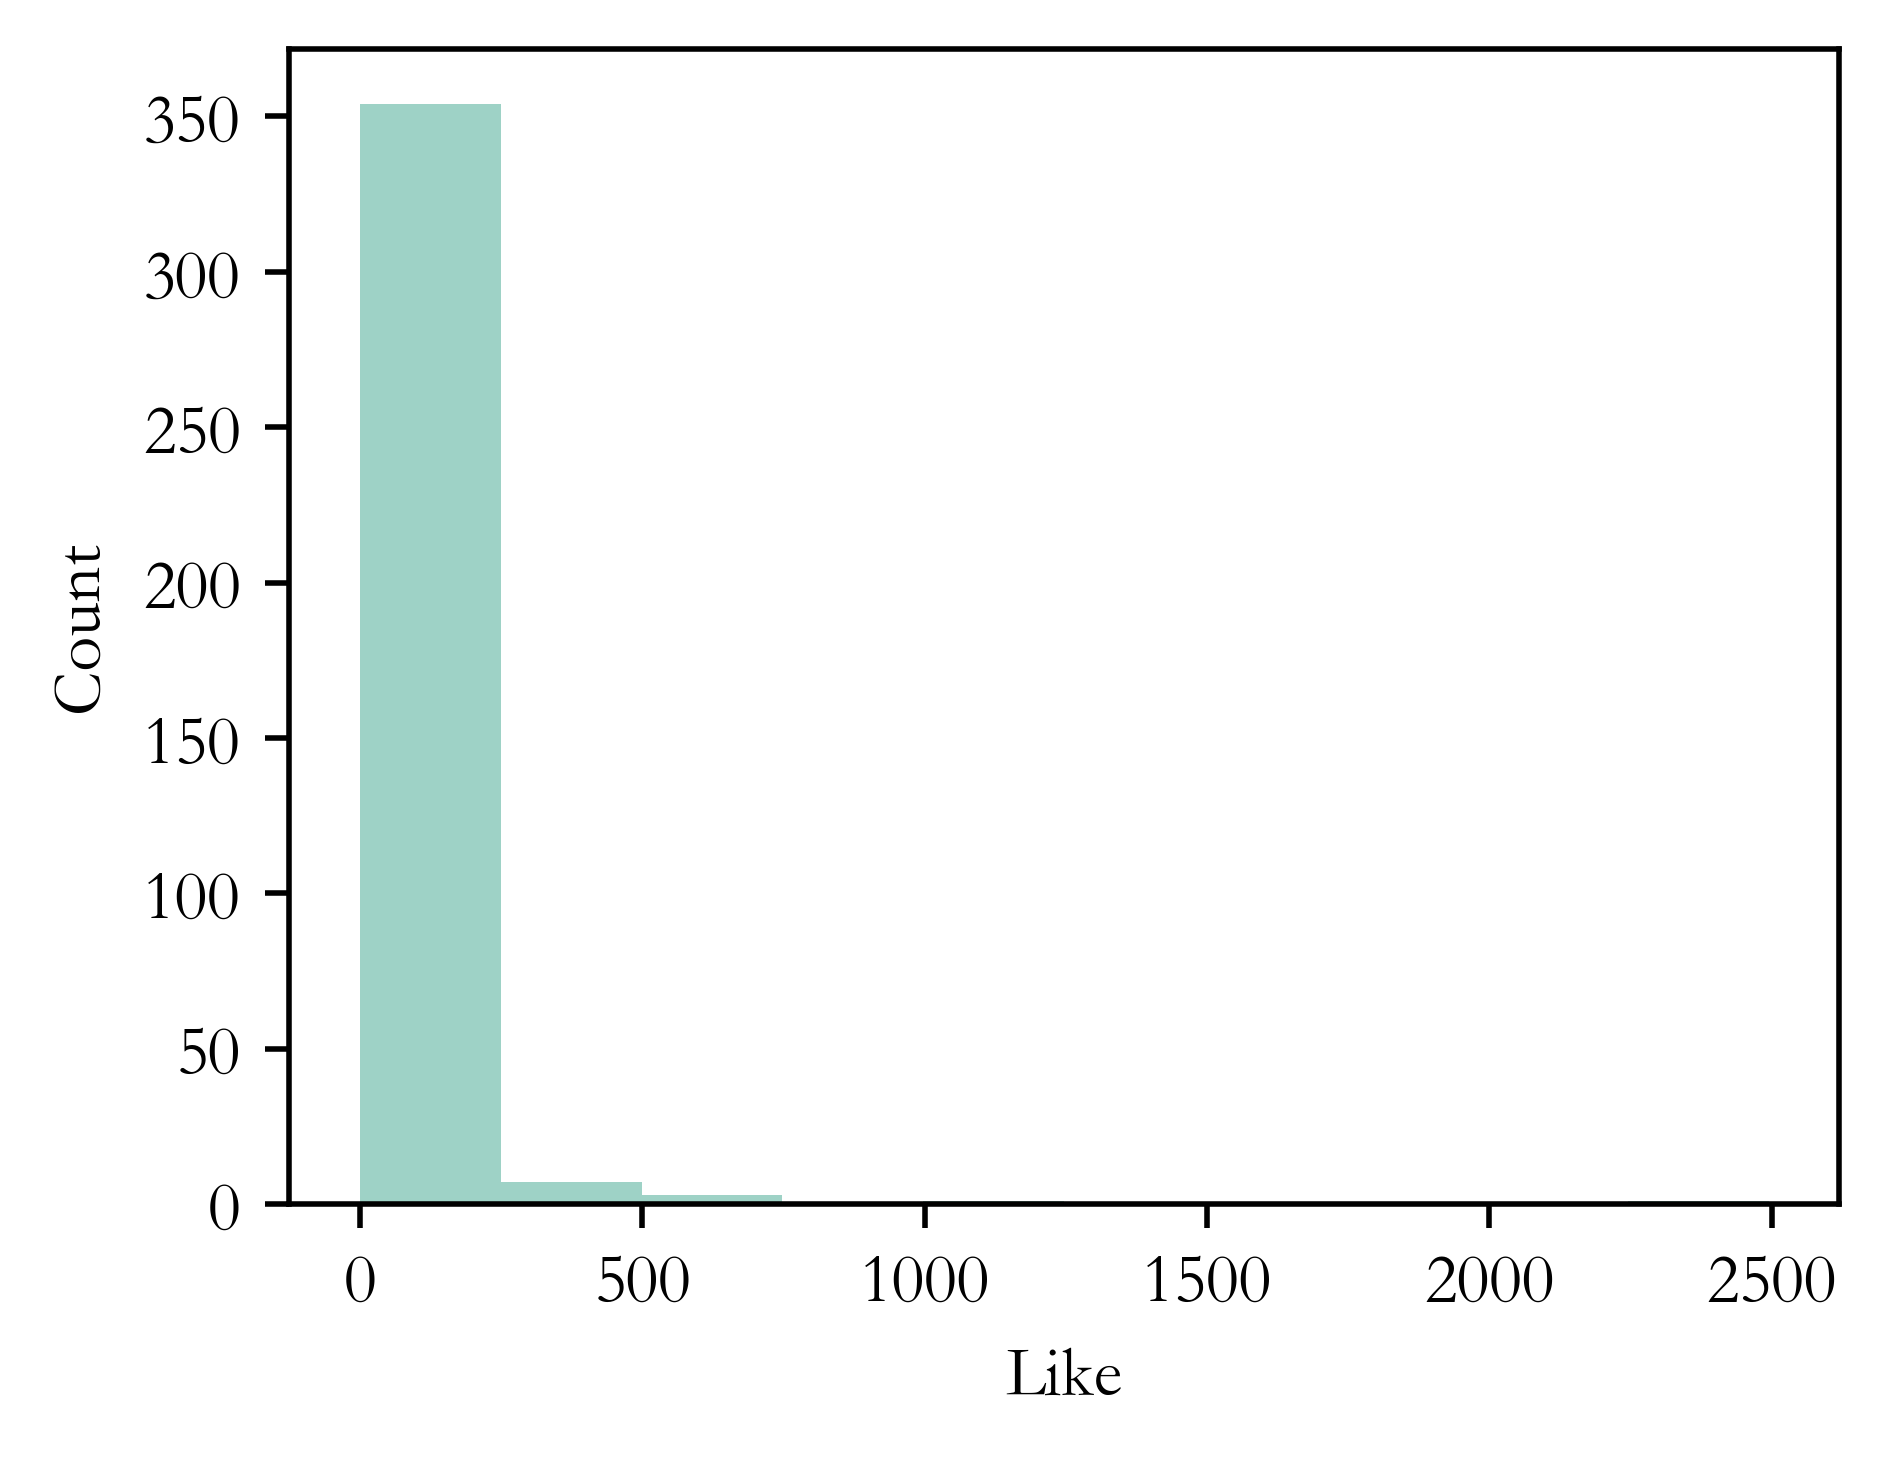

In [40]:
plt.figure(figsize = (4, 3), dpi=500)
plt.hist(x=df.like, color='#9ED2C6')
plt.xlabel('Like')
plt.ylabel('Count')
plt.show()

对点赞量做对数变换，变换后的数据基本呈正态分布。

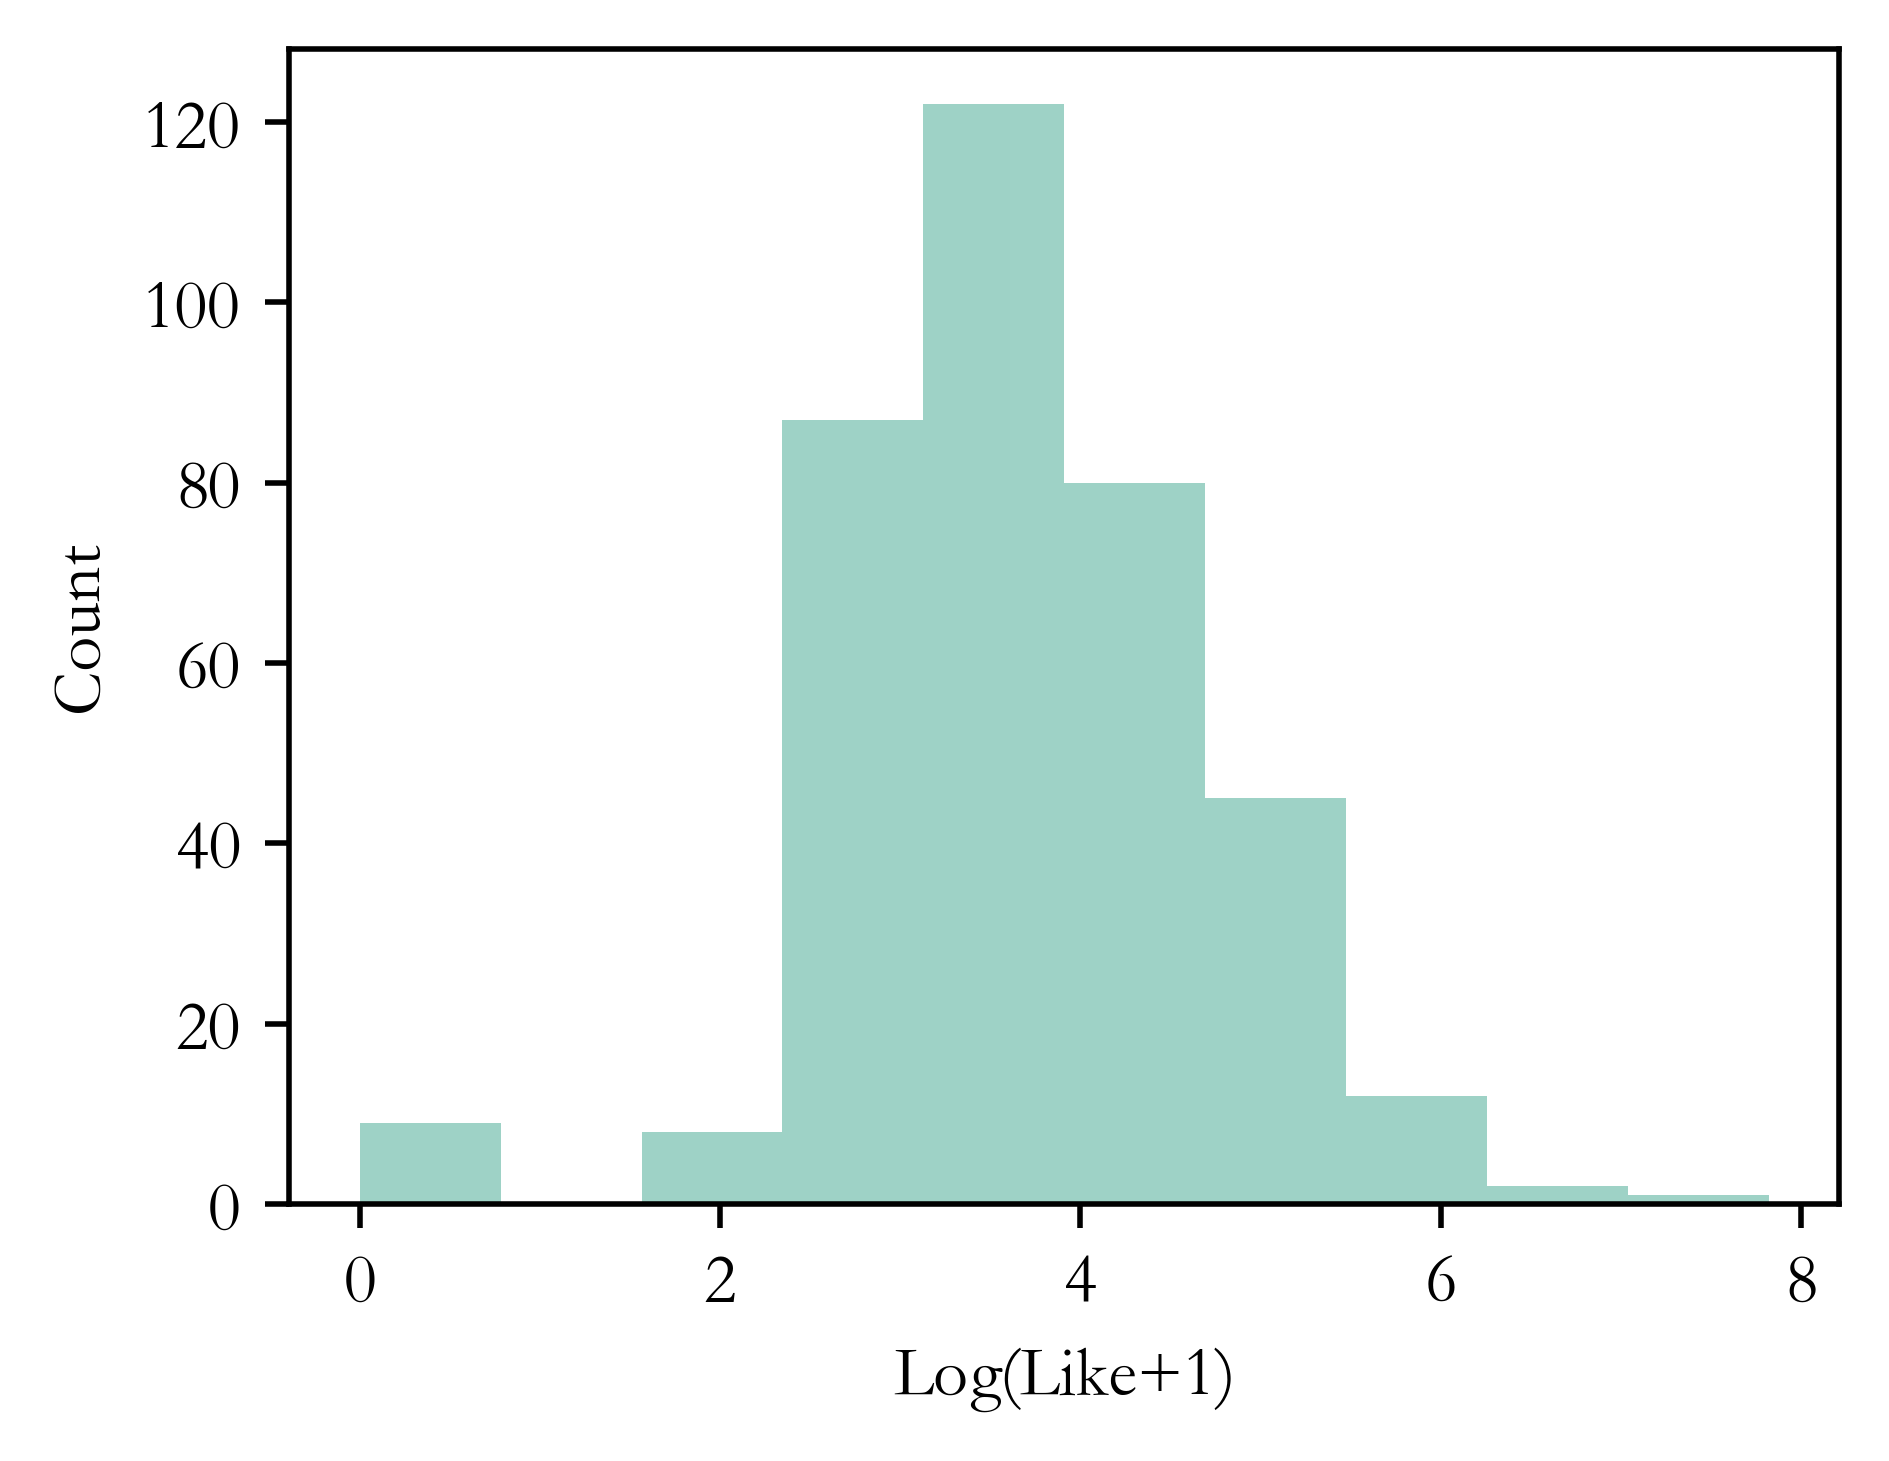

In [41]:
df['log_like'] = np.log1p(df['like'])

plt.figure(figsize = (4, 3), dpi=500)
plt.hist(x=df.log_like, color='#9ED2C6')
plt.xlabel('Log(Like+1)')
plt.ylabel('Count')
plt.show()

调整数据的列顺序。

In [42]:
df = df[['date', 'source', 'source_num', 'content', 'core', 'province', 'like', 'log_like', 'views', 'user_0', 'user_1', 'user_2', 'user_3', 'user_4', 'user_5',
         'user_6', 'user_7', 'user_8', 'user_9','user_10', 'user_11', 'user_12', 'user_13', 'user_14', 'user_15', 'user_16', 'user_17']]
df.head(3)

,date,source,source_num,content,core,province,like,log_like,views,user_0,...,user_8,user_9,user_10,user_11,user_12,user_13,user_14,user_15,user_16,user_17
0,2022-02-18,北京日报客户端,1,“有人从香港游泳偷渡到深圳湾被捕？”假的！系轻生被救！,有人从香港游泳偷渡到深圳湾被捕？,广东省,0,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-02-18,大河报、羊城晚报,2,近日，社交媒体上一则题为“河南一位老爷爷考上清华大学被顶替”的消息引发网友关注和转发。消息称...,河南一位老爷爷考上清华大学被顶替,河南省,41,3.737670,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-02-17,南方都市报、大众网,2,近日，网传“湖南衡阳南岳衡山寺庙高薪招聘住持，月薪高达5万元，弹性工作制，下班后原则上不干预...,湖南衡阳南岳衡山寺庙高薪招聘住持，月薪高达5万元，弹性工作制，下班后原则上不干预私生活,湖南省,26,3.295837,1,0,...,0,0,0,0,0,0,0,1,0,0


## 1.6 保存清洗后的数据

文本数据。

In [43]:
df_text = df[['date', 'source', 'source_num', 'content', 'core', 'province', 'like', 'log_like', 'views']]
df_text.to_csv('data/rumor_text_data.csv', index=False)

辟谣来源数据。

In [44]:
df_source_dum.to_csv('data/rumor_source_data.csv', index=False)

用户浏览数据。

In [45]:
df_user_dum = df[['user_0', 'user_1', 'user_2', 'user_3', 'user_4', 'user_5', 'user_6','user_7', 'user_8', 'user_9',
                  'user_10', 'user_11', 'user_12', 'user_13', 'user_14', 'user_15', 'user_16', 'user_17']]
df_user_dum.to_csv('data/rumor_user_data.csv', index=False)